#**Analisis dan Prediksi Harga Smartphone Menggunakan Linear Regression**

##A. Import Library & Load Dataset

> Penjelasan:
Bagian ini untuk memanggil library yang dibutuhkan dan membaca file dataset agar bisa dianalisis.

In [8]:
# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tampilkan grafik langsung di notebook
%matplotlib inline

# Load data
# from google.colab import files
# uploaded = files.colab.files.upload()   # upload file .csv dari komputer

data = pd.read_csv('/content/data-smartphone.csv')  # ganti nama file sesuai yang diupload
data.columns = data.columns.str.strip() # Clean up column names by removing leading/trailing spaces
data.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


##B. Eksplorasi Awal Data (EDA)

> Penjelasan:
Melihat distribusi brand dan gambaran umum data numerik lewat boxplot dan bar chart.

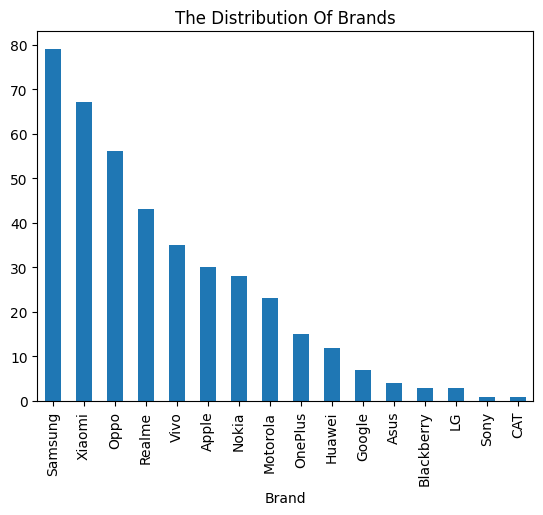

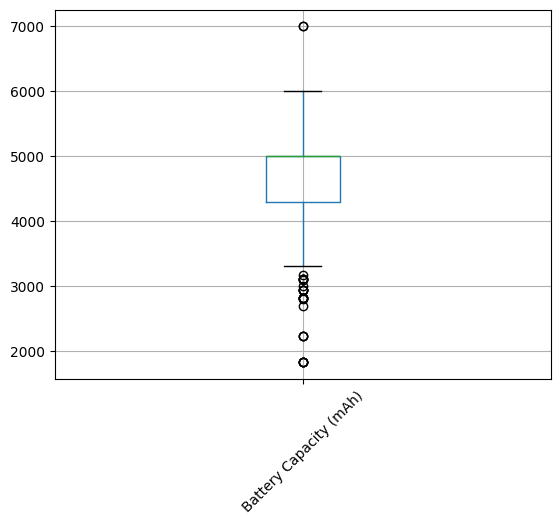

In [10]:
# Distribusi brand
data['Brand'].value_counts().plot.bar()
plt.title("The Distribution Of Brands")
plt.show()

# Boxplot semua kolom numerik
data.boxplot()
plt.xticks(rotation=45)
plt.show()


##C. Analisis Perbandingan Brand dan Fitur Numerik

> Penjelasan:
Melihat perbedaan fitur numerik berdasarkan brand menggunakan boxplot.

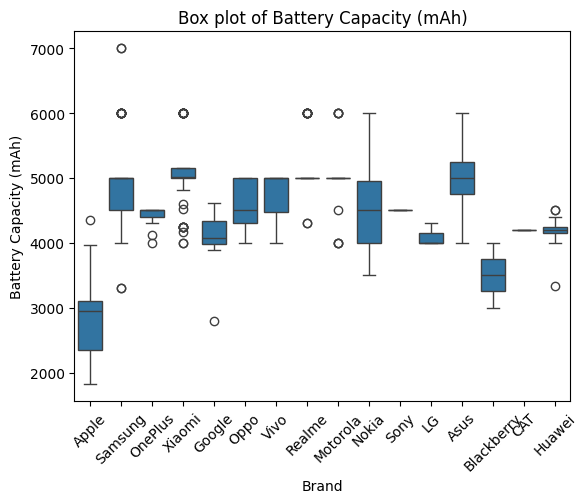

In [11]:
numeric_cols = data.select_dtypes(include=['number']).columns

for i in numeric_cols:
    sns.boxplot(data=data, x='Brand', y=i)
    plt.ylabel(i)
    plt.xticks(rotation=45)
    plt.title("Box plot of " + i)
    plt.show()


##D. Hubungan antara Fitur dan Harga

> Penjelasan:
Melihat korelasi antara fitur dengan harga menggunakan scatter plot.

DataFrame columns: Index(['Brand', 'Model', 'Storage', 'RAM', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')


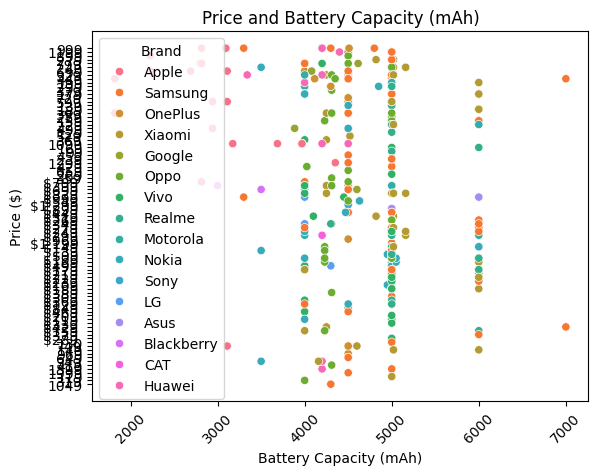

In [14]:
print("DataFrame columns:", data.columns)
numeric_cols = [col for col in data.select_dtypes(include=['number']).columns if col.strip() != "Price ($)".strip()]

for i in numeric_cols:
    sns.scatterplot(data=data, x=i, y='Price ($)', hue='Brand')
    plt.xticks(rotation=45)
    plt.title("Price and " + i)
    plt.show()

##**E. Heatmap Korelasi Fitur Numerik**

> Penjelasan:
Untuk mengetahui hubungan linear antar fitur numerik dan harga.

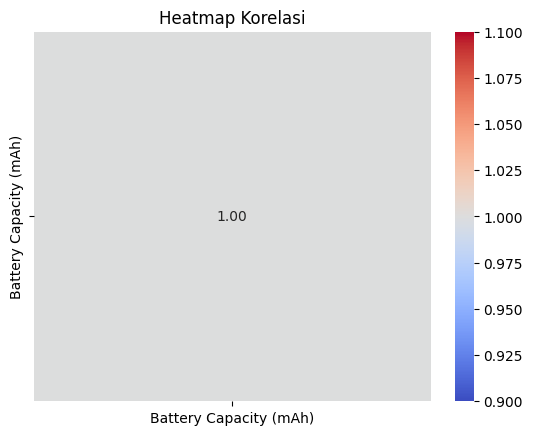

In [15]:
numeric_cols = data.select_dtypes(include=['number'])
corr_mat = numeric_cols.corr()
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()


##**F. Encoding Data Kategorik (Brand)**

> Penjelasan:
Mengubah kolom Brand menjadi bentuk numerik dengan one-hot encoding agar bisa diproses model ML.

In [16]:
data = pd.get_dummies(data, columns=['Brand'])
data.head()


,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),Brand_Apple,Brand_Asus,Brand_Blackberry,...,Brand_LG,Brand_Motorola,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi
0,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##**G. Normalisasi & Pemisahan Data**

> Penjelasan:
Menormalkan fitur dan membagi data jadi train dan test.

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Clean 'Storage' and 'RAM' columns
data['Storage'] = data['Storage'].astype(str).str.replace(' GB', '', regex=False)
data['RAM'] = data['RAM'].astype(str).str.replace(' GB', '', regex=False)

# Convert 'Storage' and 'RAM' to numeric, coercing errors
data['Storage'] = pd.to_numeric(data['Storage'], errors='coerce')
data['RAM'] = pd.to_numeric(data['RAM'], errors='coerce')

# Handle 'Camera (MP)' column - extract the first number and convert to numeric
data['Camera (MP)'] = data['Camera (MP)'].astype(str).apply(lambda x: x.split('+')[0] if '+' in x else x)
data['Camera (MP)'] = pd.to_numeric(data['Camera (MP)'], errors='coerce')

# Convert 'Screen Size (inches)' to numeric, coercing errors
data['Screen Size (inches)'] = pd.to_numeric(data['Screen Size (inches)'], errors='coerce')

# Clean and convert 'Price ($)' to numeric
data['Price ($)'] = data['Price ($)'].astype(str).str.replace('$', '', regex=False).str.replace(' ', '', regex=False)
data['Price ($)'] = pd.to_numeric(data['Price ($)'], errors='coerce')


# Pisahkan fitur dan target
x = data.drop(columns=['Price ($)', 'Model']) # Exclude 'Model' column
y = data['Price ($)']

# Add print statements to inspect x before scaling
print("Data types of x before scaling:")
print(x.dtypes)
print("\nFirst 5 rows of x before scaling:")
print(x.head())

# Normalisasi fitur
scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Split train test
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

Data types of x before scaling:
Storage                   float64
RAM                       float64
Screen Size (inches)      float64
Camera (MP)               float64
Battery Capacity (mAh)      int64
Brand_Apple                  bool
Brand_Asus                   bool
Brand_Blackberry             bool
Brand_CAT                    bool
Brand_Google                 bool
Brand_Huawei                 bool
Brand_LG                     bool
Brand_Motorola               bool
Brand_Nokia                  bool
Brand_OnePlus                bool
Brand_Oppo                   bool
Brand_Realme                 bool
Brand_Samsung                bool
Brand_Sony                   bool
Brand_Vivo                   bool
Brand_Xiaomi                 bool
dtype: object

First 5 rows of x before scaling:
   Storage   RAM  Screen Size (inches)  Camera (MP)  Battery Capacity (mAh)  \
0    128.0   6.0                  6.10         12.0                    3095   
1    256.0  12.0                  6.80        1

##**H. Training Model Linear Regression**

> Penjelasan:
Melatih model linear regression untuk memprediksi harga.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer

# Impute missing values in x_train and x_test
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Impute missing values in y_train
y_train_imputed = y_train.fillna(y_train.mean())


# Latih model
model = LinearRegression()
model.fit(x_train_imputed, y_train_imputed)

# Prediksi data test
y_pred = model.predict(x_test_imputed)

# Add print statements to display evaluation metrics
print("Model Training Complete.")

Model Training Complete.


##**I. Visualisasi Hasil Prediksi**

> Penjelasan:
Membandingkan hasil prediksi dan harga asli dengan scatter plot.

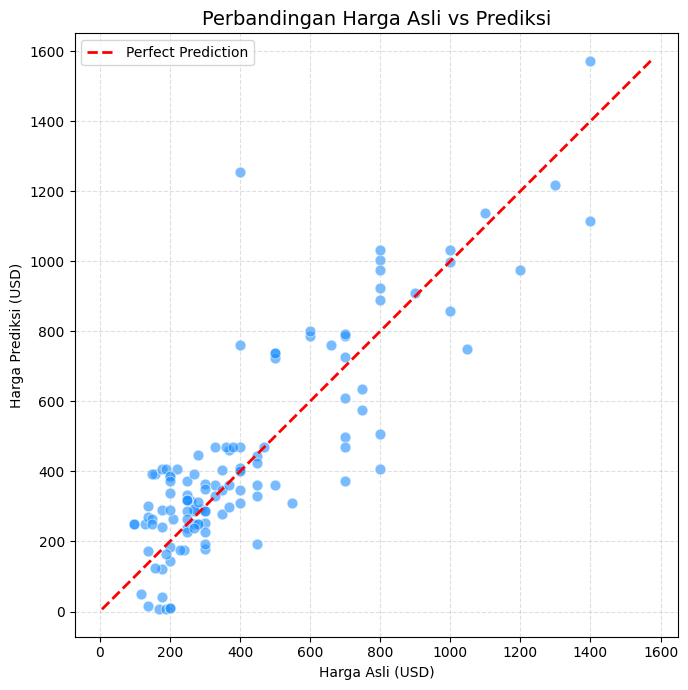

MSE: 25492.2563843414
MAE: 116.1840729073758
R² Score: 0.6913552282190958


In [29]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred, color="dodgerblue", alpha=0.6, s=60)

max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label="Perfect Prediction")

plt.title("Perbandingan Harga Asli vs Prediksi", fontsize=14)
plt.xlabel("Harga Asli (USD)")
plt.ylabel("Harga Prediksi (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Impute missing values in y_test before evaluation
y_test_imputed = y_test.fillna(y_test.mean())


# Evaluasi model
print("MSE:", mean_squared_error(y_test_imputed, y_pred))
print("MAE:", mean_absolute_error(y_test_imputed, y_pred))
print("R² Score:", r2_score(y_test_imputed, y_pred))

##**J. Prediksi Harga Smartphone Baru**

> Penjelasan:
Memasukkan data spesifikasi baru dan memprediksi harganya.

In [30]:
# Buat data baru
new_data = pd.DataFrame([{
    'Storage ': 256,
    'RAM ': 8,
    'Screen Size (inches)': 6.8,
    'Camera (MP)': 108,
    'Battery Capacity (mAh)': 5000,
    'Brand_Apple': 1,
    'Brand_Asus': 0,
    'Brand_Blackberry': 0,
    'Brand_CAT': 0,
    'Brand_Google': 0,
    'Brand_Huawei': 0,
    'Brand_LG': 0,
    'Brand_Motorola': 0,
    'Brand_Nokia': 0,
    'Brand_OnePlus': 0,
    'Brand_Oppo': 0,
    'Brand_Realme': 0,
    'Brand_Samsung': 0,
    'Brand_Sony': 0,
    'Brand_Vivo': 0,
    'Brand_Xiaomi': 0
}])

# Sesuaikan kolom
for col in x.columns:
    if col not in new_data.columns:
        new_data[col] = 0
new_data = new_data[x.columns]

# Scaling pakai scaler lama
new_data_scaled = pd.DataFrame(scaler.transform(new_data), columns=x.columns)

# Prediksi
pred_price = model.predict(new_data_scaled)
print(f"💰 Prediksi harga (USD): {pred_price[0]:.2f}")


💰 Prediksi harga (USD): 352.99


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [31]:
!pip freeze | grep -E "pandas|numpy|matplotlib|seaborn|scikit-learn" > requirements.txt


In [32]:
!ls -lh


total 36K
-rw-r--r-- 1 root root  23K Oct 15 15:35 data-smartphone.csv
drwx------ 5 root root 4.0K Oct 15 15:35 drive
-rw-r--r-- 1 root root  241 Oct 15 16:08 requirements.txt
drwxr-xr-x 1 root root 4.0K Oct 13 13:43 sample_data


In [33]:
from google.colab import files
files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>